**빛을 응용한 뇌 내 성분 검사**는 피부 상처 없이 다양한 성분 정보를 알 수 있습니다. 이는 뇌 활동 연구를 위해 신경영상을 얻을 수 있는 방법으로, 바늘(전극)을 찔러 넣는 방법인 뇌전도 검사를 대체할 방안으로 각광 받고 있습니다.

제공된 데이터로 뇌 내 성분 분석 알고리즘을 만들어 주세요.

In [1]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
data = pd.read_csv("../Data/Biometric Data Analysis/train.csv")
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 76 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   id       10000 non-null  int64  
 1   rho      10000 non-null  int64  
 2   650_src  10000 non-null  float64
 3   660_src  10000 non-null  float64
 4   670_src  10000 non-null  float64
 5   680_src  10000 non-null  float64
 6   690_src  10000 non-null  float64
 7   700_src  10000 non-null  float64
 8   710_src  10000 non-null  float64
 9   720_src  10000 non-null  float64
 10  730_src  10000 non-null  float64
 11  740_src  10000 non-null  float64
 12  750_src  10000 non-null  float64
 13  760_src  10000 non-null  float64
 14  770_src  10000 non-null  float64
 15  780_src  10000 non-null  float64
 16  790_src  10000 non-null  float64
 17  800_src  10000 non-null  float64
 18  810_src  10000 non-null  float64
 19  820_src  10000 non-null  float64
 20  830_src  10000 non-null  float64
 21  840_src  1000

**Features** \
id : 구분자 \
rho : 측정 거리 (단위: mm) \
src : 광원 스펙트럼 (650 nm ~ 990 nm) 해당 파장에서 빛의 세기 \
dst : 측정 스펙트럼 (650 nm ~ 990 nm)

**Labels** \
hhb : 디옥시헤모글로빈 농도(간질 활성화, 산소와 결합하지 않은 헤모글로빈) \
hbo2 : 옥시헤모글로빈 농도 \
ca : 칼슘 농도 \
na : 나트륨 농도

In [3]:
data.head()

,id,rho,650_src,660_src,670_src,680_src,690_src,700_src,710_src,720_src,...,940_dst,950_dst,960_dst,970_dst,980_dst,990_dst,hhb,hbo2,ca,na
0,0,25,0.37950,0.42993,0.52076,0.57166,0.67818,0.75476,0.83580,0.93623,...,NaN,0.000000e+00,NaN,1.067504e-18,5.998949e-18,4.378513e-17,5.59,4.32,8.92,4.29
1,1,10,0.00000,0.00000,0.01813,0.00000,0.00000,0.01974,0.00321,0.00000,...,1.343132e-08,6.112685e-09,2.130547e-09,NaN,9.710091e-09,NaN,0.00,2.83,7.25,4.64
2,2,25,0.00000,0.03289,0.02416,0.03610,0.05843,0.09015,0.14944,0.18578,...,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.329725e-18,NaN,10.64,3.00,8.40,5.16
3,3,10,0.27503,0.31281,0.32898,0.41041,0.46587,0.52769,0.64369,0.73562,...,2.245998e-10,1.299511e-10,7.782625e-11,NaN,4.088921e-10,NaN,5.67,4.01,5.05,4.35
4,4,15,1.01521,1.00872,0.98930,0.98874,1.01773,1.01632,1.00009,0.98217,...,1.457955e-13,8.769053e-14,NaN,1.330237e-13,NaN,NaN,11.97,4.41,10.78,2.42


In [4]:
# in dst, NaN means not detected.
data = data.fillna(0)

In [5]:
data.rho.unique()
data.drop("id", axis=1, inplace=True)

In [6]:
# group by rho

data_rho_25 = data[data['rho'] == 25]
data_rho_20 = data[data['rho'] == 20]
data_rho_15 = data[data['rho'] == 15]
data_rho_10 = data[data['rho'] == 10]

In [7]:
print("rho = 25: ", (data_rho_25.shape))
print("rho = 20: ", (data_rho_20.shape))
print("rho = 15: ", (data_rho_15.shape))
print("rho = 10: ", (data_rho_10.shape))

rho = 25:  (2557, 75)
rho = 20:  (2478, 75)
rho = 15:  (2509, 75)
rho = 10:  (2456, 75)


In [8]:
def heatmap(df):
    corr = df.corr() 
    corr1 = corr.loc[corr.index[36:-4], corr.columns[-4:]]
    corr2 = corr.loc[corr.index[1:36], corr.columns[-4:]]
    
    fig, ax = plt.subplots(1,2, figsize=(20,10))
    sns.heatmap(corr1, annot=True, linewidths=.5, ax=ax[0])
    sns.heatmap(corr2, annot=True, linewidths=.5, ax=ax[1])

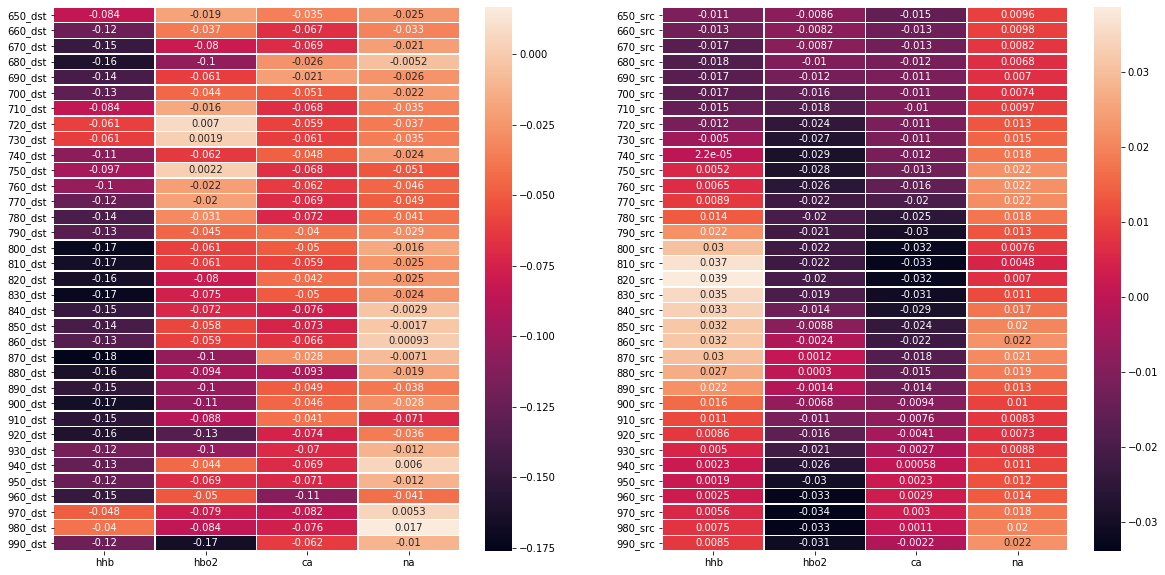

In [9]:
heatmap(data_rho_25)

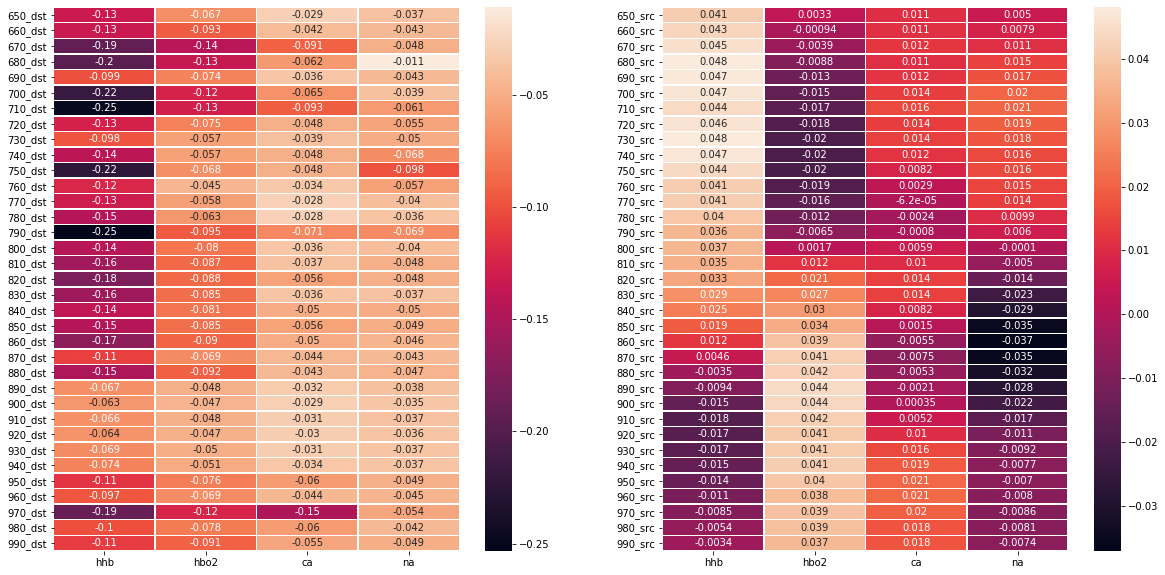

In [10]:
heatmap(data_rho_20)

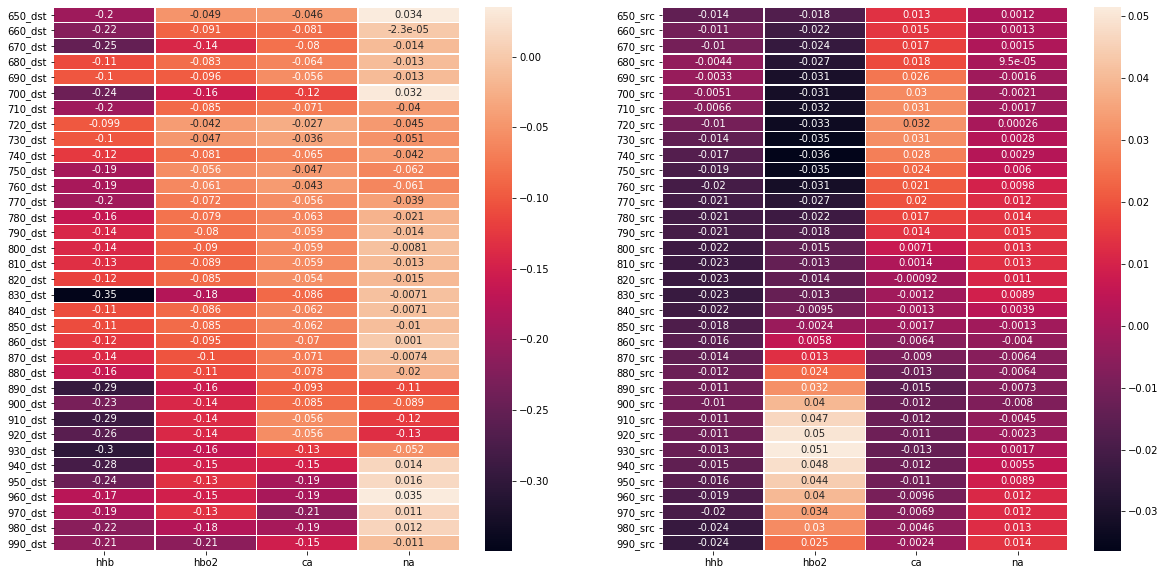

In [11]:
heatmap(data_rho_15)

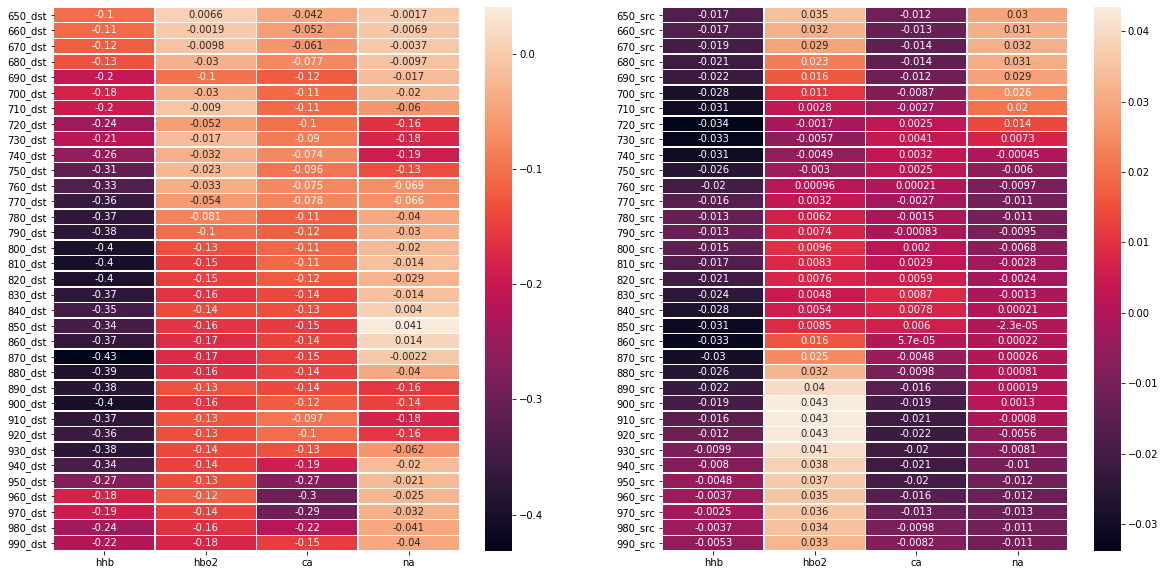

In [12]:
heatmap(data_rho_10)

### XG Boost

In [9]:
import xgboost as xgb
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split

In [10]:
def XY(df):
    X = df.iloc[:,36:-4]
    y_hhb = df.iloc[:,-4]
    y_hhbo2 = df.iloc[:,-3]
    y_ca = df.iloc[:,-2]
    y_na = df.iloc[:,-1]
    
    return X, y_hhb, y_hhbo2, y_ca, y_na

In [11]:
def XG_Boost(df, num):
    X, y_hhb, y_hhbo2, y_ca, y_na = XY(df)
    
    # Split data
    X1_train, X1_test, y1_train, y1_test = train_test_split(X, y_hhb, test_size=0.2, shuffle=1234)
    X2_train, X2_test, y2_train, y2_test = train_test_split(X, y_hhbo2, test_size=0.2, shuffle=1234)
    X3_train, X3_test, y3_train, y3_test = train_test_split(X, y_ca, test_size=0.2, shuffle=1234)
    X4_train, X4_test, y4_train, y4_test = train_test_split(X, y_na, test_size=0.2, shuffle=1234)
    
    
    xg_reg_hbb = xgb.XGBRegressor(colsample_bytree=0.4603, gamma=0.0468, 
                             learning_rate=0.05, max_depth=3, 
                             min_child_weight=1.7817, n_estimators=2200,
                             reg_alpha=0.4640, reg_lambda=0.8571,
                             subsample=0.5213, silent=1,
                             random_state =7, nthread = -1)
    xg_reg_hbo2 = xgb.XGBRegressor(colsample_bytree=0.4603, gamma=0.0468, 
                             learning_rate=0.05, max_depth=3, 
                             min_child_weight=1.7817, n_estimators=2200,
                             reg_alpha=0.4640, reg_lambda=0.8571,
                             subsample=0.5213, silent=1,
                             random_state =7, nthread = -1)
    xg_reg_ca = xgb.XGBRegressor(colsample_bytree=0.4603, gamma=0.0468, 
                             learning_rate=0.05, max_depth=3, 
                             min_child_weight=1.7817, n_estimators=2200,
                             reg_alpha=0.4640, reg_lambda=0.8571,
                             subsample=0.5213, silent=1,
                             random_state =7, nthread = -1)
    xg_reg_na = xgb.XGBRegressor(colsample_bytree=0.4603, gamma=0.0468, 
                             learning_rate=0.05, max_depth=3, 
                             min_child_weight=1.7817, n_estimators=2200,
                             reg_alpha=0.4640, reg_lambda=0.8571,
                             subsample=0.5213, silent=1,
                             random_state =7, nthread = -1)
    
    
    xg_reg_hbb.fit(X1_train,y1_train)
    preds_hbb = xg_reg_hbb.predict(X1_test)

    xg_reg_hbo2.fit(X2_train,y2_train)
    preds_hbo2 = xg_reg_hbo2.predict(X2_test)

    xg_reg_ca.fit(X3_train,y3_train)
    preds_ca = xg_reg_ca.predict(X3_test)

    xg_reg_na.fit(X4_train,y4_train)
    preds_na = xg_reg_na.predict(X4_test)
    
    
    rmse_hbb = np.sqrt(mean_squared_error(y1_test, preds_hbb))
    rmse_hbo2 = np.sqrt(mean_squared_error(y2_test, preds_hbo2))
    rmse_ca = np.sqrt(mean_squared_error(y3_test, preds_ca))
    rmse_na = np.sqrt(mean_squared_error(y4_test, preds_na))

    print(num, " mm")
    print("RMSE - hbb  : %f" % (rmse_hbb))
    print("RMSE - hbo2 : %f" % (rmse_hbo2))
    print("RMSE - ca   : %f" % (rmse_ca))
    print("RMSE - na   : %f" % (rmse_na))
    
    
    return xg_reg_hbb, xg_reg_hbo2, xg_reg_ca, xg_reg_na

In [12]:
# data_rho_25, data_rho_20, data_rho_15, data_rho_10

hbb_25, hbo2_25, ca_25, na_25 = XG_Boost(data_rho_25, 25)

hbb_20, hbo2_20, ca_20, na_20 = XG_Boost(data_rho_20, 20)

hbb_15, hbo2_15, ca_15, na_15 = XG_Boost(data_rho_15, 15)

hbb_10, hbo2_10, ca_10, na_10 = XG_Boost(data_rho_10, 10)

25  mm
RMSE - hbb  : 1.729608
RMSE - hbo2 : 0.896043
RMSE - ca   : 2.744768
RMSE - na   : 1.899397
20  mm
RMSE - hbb  : 1.668188
RMSE - hbo2 : 0.864020
RMSE - ca   : 2.708705
RMSE - na   : 1.757228
15  mm
RMSE - hbb  : 1.694319
RMSE - hbo2 : 0.925308
RMSE - ca   : 2.667133
RMSE - na   : 1.699291
10  mm
RMSE - hbb  : 1.721985
RMSE - hbo2 : 0.924476
RMSE - ca   : 2.627521
RMSE - na   : 1.498128


In [13]:
test = pd.read_csv("../Data/Biometric Data Analysis/test.csv")

In [14]:
test.head()

,id,rho,650_src,660_src,670_src,680_src,690_src,700_src,710_src,720_src,...,900_dst,910_dst,920_dst,930_dst,940_dst,950_dst,960_dst,970_dst,980_dst,990_dst
0,10000,15,0.15406,0.23275,0.30977,0.42949,0.51264,0.62558,0.74340,0.85418,...,0.000000e+00,0.000000e+00,1.432248e-14,0.000000e+00,0.000000e+00,6.332117e-15,1.429966e-14,0.000000e+00,NaN,7.320236e-14
1,10001,15,0.48552,0.56939,0.67575,0.79089,0.85114,0.92581,0.98071,0.98177,...,1.036013e-13,NaN,2.830975e-14,1.114337e-13,4.825731e-14,NaN,2.282485e-14,7.348414e-14,1.259055e-13,2.349874e-13
2,10002,10,0.46883,0.56085,0.62442,0.73172,0.81724,0.91517,0.94801,0.99108,...,NaN,NaN,NaN,NaN,1.569208e-11,6.242378e-12,NaN,1.219010e-11,NaN,NaN
3,10003,10,0.06905,0.07517,0.10226,0.14905,0.16182,0.19659,0.26085,0.36753,...,1.651177e-11,7.282747e-12,5.010879e-12,NaN,1.571023e-11,0.000000e+00,0.000000e+00,3.304247e-12,4.106134e-11,NaN
4,10004,25,0.00253,0.00757,0.01649,0.00128,0.00000,0.00000,0.00105,0.01975,...,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,3.732057e-17,4.110605e-17,0.000000e+00,0.000000e+00,1.910775e-16,2.215673e-15


In [15]:
test = test.fillna(0)

In [16]:
test_rho_25 = test[test['rho'] == 25]
test_rho_20 = test[test['rho'] == 20]
test_rho_15 = test[test['rho'] == 15]
test_rho_10 = test[test['rho'] == 10]

In [17]:
test_rho_25.head()

,id,rho,650_src,660_src,670_src,680_src,690_src,700_src,710_src,720_src,...,900_dst,910_dst,920_dst,930_dst,940_dst,950_dst,960_dst,970_dst,980_dst,990_dst
4,10004,25,0.00253,0.00757,0.01649,0.00128,0.00000,0.00000,0.00105,0.01975,...,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,3.732057e-17,4.110605e-17,0.000000e+00,0.000000e+00,1.910775e-16,2.215673e-15
7,10007,25,0.02086,0.01274,0.00564,0.02591,0.02021,0.03552,0.04008,0.08058,...,0.000000e+00,0.000000e+00,1.179564e-18,3.953631e-19,3.859850e-20,8.408864e-19,1.776008e-20,2.324328e-19,7.958847e-19,1.578751e-17
9,10009,25,0.02078,0.02109,0.03051,0.03936,0.04283,0.03698,0.04585,0.03145,...,1.916856e-18,0.000000e+00,5.892738e-18,3.100210e-18,2.826076e-18,1.850818e-18,2.246850e-18,7.996434e-19,8.171193e-18,5.091564e-17
20,10020,25,0.01464,0.04451,0.08738,0.13294,0.20736,0.29773,0.41921,0.58363,...,0.000000e+00,3.124124e-19,0.000000e+00,6.877190e-20,0.000000e+00,0.000000e+00,0.000000e+00,1.873963e-19,0.000000e+00,0.000000e+00
23,10023,25,0.04235,0.04854,0.06521,0.11027,0.12912,0.21326,0.25468,0.34638,...,4.755581e-19,0.000000e+00,5.863937e-19,5.275918e-19,0.000000e+00,0.000000e+00,8.404945e-19,0.000000e+00,0.000000e+00,4.558269e-19


In [18]:
# features: iloc[1:]

In [19]:
test_rho_25.iloc[:, 1:].head()

,rho,650_src,660_src,670_src,680_src,690_src,700_src,710_src,720_src,730_src,...,900_dst,910_dst,920_dst,930_dst,940_dst,950_dst,960_dst,970_dst,980_dst,990_dst
4,25,0.00253,0.00757,0.01649,0.00128,0.00000,0.00000,0.00105,0.01975,0.00000,...,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,3.732057e-17,4.110605e-17,0.000000e+00,0.000000e+00,1.910775e-16,2.215673e-15
7,25,0.02086,0.01274,0.00564,0.02591,0.02021,0.03552,0.04008,0.08058,0.08955,...,0.000000e+00,0.000000e+00,1.179564e-18,3.953631e-19,3.859850e-20,8.408864e-19,1.776008e-20,2.324328e-19,7.958847e-19,1.578751e-17
9,25,0.02078,0.02109,0.03051,0.03936,0.04283,0.03698,0.04585,0.03145,0.06261,...,1.916856e-18,0.000000e+00,5.892738e-18,3.100210e-18,2.826076e-18,1.850818e-18,2.246850e-18,7.996434e-19,8.171193e-18,5.091564e-17
20,25,0.01464,0.04451,0.08738,0.13294,0.20736,0.29773,0.41921,0.58363,0.76227,...,0.000000e+00,3.124124e-19,0.000000e+00,6.877190e-20,0.000000e+00,0.000000e+00,0.000000e+00,1.873963e-19,0.000000e+00,0.000000e+00
23,25,0.04235,0.04854,0.06521,0.11027,0.12912,0.21326,0.25468,0.34638,0.45072,...,4.755581e-19,0.000000e+00,5.863937e-19,5.275918e-19,0.000000e+00,0.000000e+00,8.404945e-19,0.000000e+00,0.000000e+00,4.558269e-19


In [24]:
def prediction(hbb, hbo2, ca, na, df):
    
    test = df.iloc[:, 37:]
    
    preds_hbb = hbb.predict(test)
    preds_hbo2 = hbo2.predict(test)
    preds_ca = ca.predict(test)
    preds_na = na.predict(test)
    
    df_1 = df.copy()
    
    df_1['hhb'] = preds_hbb
    df_1['hbo2'] = preds_hbo2
    df_1['ca'] = preds_ca
    df_1['na'] = preds_na
    
    return df_1

In [25]:
# test_rho_25 - hbb_25, hbo2_25, ca_25, na_25
# test_rho_20 - hbb_20, hbo2_20, ca_20, na_20
# test_rho_15 - hbb_15, hbo2_15, ca_15, na_15
# test_rho_10 - hbb_10, hbo2_10, ca_10, na_10

rho_25 = prediction(hbb_25, hbo2_25, ca_25, na_25, test_rho_25)
rho_20 = prediction(hbb_20, hbo2_20, ca_20, na_20, test_rho_20)
rho_15 = prediction(hbb_15, hbo2_15, ca_15, na_15, test_rho_15)
rho_10 = prediction(hbb_10, hbo2_10, ca_10, na_10, test_rho_10)

In [26]:
temp = pd.concat([rho_25, rho_20, rho_15, rho_10]).sort_values('id')
id = temp.id
temp = temp.iloc[:, -4:]

In [28]:
submission = pd.concat([id, temp], axis=1)
submission.to_csv("submission/05.csv")

In [29]:
submission.head()

,id,hhb,hbo2,ca,na
0,10000,8.773984,5.076634,11.538292,1.604496
1,10001,5.408206,3.835741,6.606059,2.034667
2,10002,8.965022,4.644113,11.243861,3.110879
3,10003,8.475914,4.690307,9.270923,4.198197
4,10004,7.311491,2.663191,8.116082,3.273913


10000